# **Training a CNN to classify the CIFAR-10 dataset**
Adapted from pytorch.org/tutorials : "Training a Classifier"


In [11]:
# libraries we need
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
import torch.nn.functional as F

In [12]:
# the whole point of pytorch is to be able to easily train models on GPU's and TPU's
# if you have a dedicated GPU, you can download CUDA from Nvidia toolkits
# this snippet of code will check if you have cuda installed, and will set the 'device' accordingly
# for now, it should probably return "Running on CPU"


if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print('Running on GPU')
    print(torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
    print('Running on CPU')

Running on GPU
Tesla T4


## Data processing

In [13]:
# load the CIFAR 10 training and testing data sets from torchvision.datasets - 10 minutes

train_dataset = torchvision.datasets.CIFAR10(root='./cifar10', transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./cifar10', transform=torchvision.transforms.ToTensor(), download=True, train=False)

Files already downloaded and verified
Files already downloaded and verified


In [14]:
# create training and testing loaders
# Hint: this bit of code will be similar to what we wrote last workshop
# experiment with batch sizes, other hyperparams
# 10 minutes 

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=True)

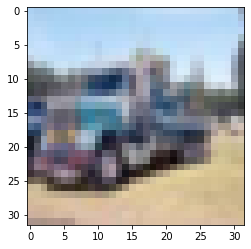

In [15]:
# visualizing a sample
# replace "None" with an iterator constructed from your train loader and run the cell
# to visualize a sample in the set
# 2 min

train_iter = iter(train_loader) # convert your train loader to an iterator

batch_images, batch_labels = next(train_iter)
image, label = batch_images[0], batch_labels[0]
plt.imshow(image.permute(1,2,0))
plt.show()

## Building the model

Remember, that CNN's have a typical architecture that involve CONV -> Maxpool -> .... -> FC -> ... Output 

https://pytorch.org/docs/stable/index.html

In [20]:
# construct your CNN model
# we've provided the basic structure of the class you need to implement
# replace all the 'None' statements and add in the architecture of your CNN
# 20 minutes
class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.c1 = nn.Conv2d(3, 6, 5, stride=1, padding=2)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.c2 = nn.Conv2d(6, 16, 5, stride=1, padding=2)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flat = nn.Flatten()
        self.d1 = nn.Linear(1024, 120)
        self.d2 = nn.Linear(120, 84)
        self.d3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool1(F.relu(self.c1(x)))
        x = self.pool2(F.relu(self.c2(x)))
        x = self.flat(x)
        x = F.relu(self.d1(x))
        x = F.relu(self.d2(x))
        x = self.d3(x) # no need for softmax
        return x

In [21]:
# create an instance of your class
# 2 minutes
model = CNN()

model.to(device) # specify that this model will be stored on the device you chose earlier (GPU or CPU)

CNN(
  (c1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (d1): Linear(in_features=1024, out_features=120, bias=True)
  (d2): Linear(in_features=120, out_features=84, bias=True)
  (d3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# choose your loss function. 
# Hint: since we're doing classification, what is a good choice for the loss function?
# 3 minutes
criterion = None

In [ ]:
# choose an optimizer and its hyperparameters
# you can experiment with different choices here and see how it affects the training
# 5 minutes - can revisit this 

optimizer = None

## Training

In [ ]:
# create a training function which takes in the pieces you just created
# and runs one epoch  (recall the definition of an epoch)
# 15 minutes

def train_one_epoch(model, train_loader, optimizer, criterion, device):


    # what is the first thing to do before starting training?



    for batch_inputs, batch_labels in train_loader:
        batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)




        # main body of your training







    print('End of epoch loss:', round(loss.item(), 3))

## Testing

In [ ]:
# 10 minutes
# function to test the model

def test(model, test_loader, device):
    # we've manually specified the classes - these are from the cifar-10 dataset
    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


    # what is the first thing to do before testing?
    

    correct = 0

    for batch_inputs, batch_labels in test_loader:
        batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)
       
       
       
       
       
       
       
        # main body of testing function






        predictions = None
        correct += None
        
    print('End of epoch accuracy:', 100*correct/len(test_dataset), '%')
    

    # visualizing the current model's performance - no changes required
    for i in range(4):
        print('Guess:', classes[predictions[i]], '| Label:', classes[batch_labels[i]])
        plt.imshow(batch_inputs[i].cpu().permute(1,2,0))
        plt.show()

# Running the train-test loop

In [ ]:
# run a loop which calls the training and testing functions
# you just created
# 5 minutes to code [ and however long to train :) ]








## Saving the weights

In [ ]:
# save the weights of your model




## Loading the weights

In [ ]:
# power outage!
# you've lost all your weights.
# or have you?
# reload the weights you just (hopefully) saved










In [18]:
# testing what the correct dimensions should be
m = nn.Sequential(
    nn.Conv2d(3, 6, 5, stride=1, padding=2),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, 5, stride=1, padding=2),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten()
)

In [19]:
input = torch.randn(16, 3, 32, 32)
output = m(input)
output.size()

torch.Size([16, 1024])